<h3 align="center"> CPSC 103 Final Project Code - Creating a Demographic Transition Model for Germany, China and Canada</h3> 

21 of 21 tests passed


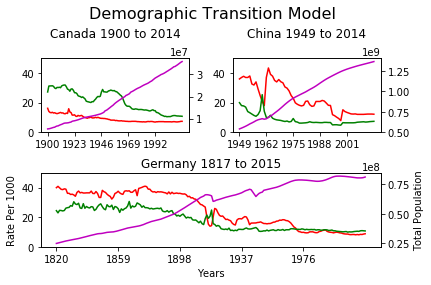

In [1]:
from typing import NamedTuple
import numpy as np 
from typing import List
import csv
from cs103 import *
import matplotlib.pyplot as plt

        
        
Country_Data = NamedTuple('Country_Data', [('name',str),
                                           ('birth_rate',float),
                                          ('death_rate',float),
                                          ('year',int),
                                          ('total_population',int)])

#interp. Country Data that includes the birth rate and death rate for a particular year

CD1820= Country_Data("Germany", 39.9,24.4,1820,24905)
CD1867= Country_Data("Germany",36.8,26.1,1867,38440)
CD1917= Country_Data("Germany",13.9,20.6,1917,65763)
CD1967= Country_Data("Germany",17,11.5,1967,76832446)
CD2007= Country_Data("Germany",8.3,10.1,2007,80955210)

def fn_for_country_data(c:Country_Data)->...:
    return ... (cd.name,
                cd.birth_rate,
               cd.death_rate,
               cd.year,
               cd.total_population)




#List[Country_Data]
#interp. a list of country data for a series of years

LOCD0=[]
LOCD1= [CD1820,CD1867,CD1917]
LOCD2=[CD1820,CD1867,CD1917,CD1967,CD2007]
LOCD3= [Country_Data("Germany",10.4,11.4,1991,79220988),
Country_Data("Germany",10,11,1992,79779840),
Country_Data("Germany",9.8,11.1,1993,80375970),
Country_Data("Germany",9.7,11.3,1994,80941393),
Country_Data("Germany",9.4,10.8,1995,81409843),
Country_Data("Germany",9.7,10.8,1996,81741836),
Country_Data("Germany",9.9,10.5,1997,81932302),
Country_Data("Germany",9.7,10.4,1998,82002008),
Country_Data("Germany",9.4,10.3,1999,81988007),
Country_Data("Germany",9.3,10.2,2000,81930878),
Country_Data("Germany",8.9,10.1,2001,81852682),
Country_Data("Germany",8.7,10.2,2002,81754634),
Country_Data("Germany",8.6,10.3,2003,81634655),
Country_Data("Germany",8.6,9.9,2004,81493636),
Country_Data("Germany",8.3,10.1,2005,81332296),
Country_Data("Germany",8.2,10,2006,81151353),
Country_Data("Germany",8.3,10.1,2007,80955210),
Country_Data("Germany",8.3,10.3,2008,80760211),
Country_Data("Germany",8.1,10.4,2009,80592796),
Country_Data("Germany",8.3,10.5,2010,80477496)]


def fn_for_locd(locd:List[Country_Data])->...:
    
    acc= []  #type:...
    
    for cd in locd:
        (acc, fn_for_country_data(cd))
    return acc


##########FUNCTIONS

def main(filename: str) -> None:
    """
    Reads the Country Data from given filename and displays it as a demographic transition model
    """
    
    return show_dtm(read(filename))

#where show_dtm is the analyze function



def read(filename: str) -> List[Country_Data]:
    """    
    reads information from the specified file and returns a list of Country Data
    """
    acc = [] # type: List[Country_Data]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        
        # skip header line
        next(reader) 
        

        for row in reader:
            cd = Country_Data((row[0]),parse_float(row[1]), parse_float(row[2]), parse_int(row[3]),parse_int(row[4]))
            acc.append(cd)
        return acc

    





def get_birth_rate (locd:List[Country_Data], n:str)->List[float]:
    """
    return list of birth rates of a given country
    """
    
    acc = []  #type: List[float]
    
    for cd in locd:
        if cd.name == n:
            acc.append(cd.birth_rate)
    return acc



def get_death_rate (locd:List[Country_Data],n:str)->List[float]:
    """
    return list of death rates of a given country
    """
    
    acc = []  #type: List[float]
    
    for cd in locd:
        if cd.name == n:
            acc.append(cd.death_rate)
    return acc

def get_year (locd:List[Country_Data],n:str)->List[int]:
    """
    return list of years for a given country
    """
    
    acc = []  #type: List[int]
    
    for cd in locd:
        if cd.name == n:
            acc.append(cd.year)
    return acc


def get_population(locd:List[Country_Data],n:str)->List[int]:
    """
    return list of total populations for given country
    """
    
    acc = []  #type: List[int]
    
    for cd in locd:
        if cd.name == n:
            acc.append(cd.total_population)
    return acc


def x_ticks (locd)-> float:
    """
    return the x-tick points
    """
    return (round(((max(range(len(locd)))+1)-(min(range(len(locd)))))/5))


def get_x_ticks(locd,n:str)-> List[int]:
    """
    return the x-ticks labels
    """
    return (np.arange(min(get_year(locd,n)), max(get_year(locd,n)),(x_ticks(get_year(locd,n)))))




#Analyze function
def show_dtm(locd: List[Country_Data])->None:
    """
    shows a chart of birth rates, death rates, and total population againt the years, for a given country
    """
    
    
    fig = plt.figure()
  


    ########AXIS 1 : GERMANY
    
    
    ax1= fig.add_subplot(212)
    
    years_Germany = get_year(locd,"Germany")
    birth_rate_Germany = get_birth_rate(locd,"Germany")
    death_rate_Germany = get_death_rate(locd,"Germany")
    total_population_Germany = get_population(locd, "Germany")
    x_ticks_Germany = get_x_ticks(locd,"Germany")
    
    
    ax1.plot(years_Germany, birth_rate_Germany, 'r', label = 'Birth Rate')
    ax1.plot(years_Germany, death_rate_Germany, 'g', label = 'Death Rate')
   
    
    ax1.set_title('Germany 1817 to 2015')
    ax1.set_xlabel('Years')
    ax1.set_ylabel('Rate Per 1000')
    ax1.axis([min(years_Germany),(max(years_Germany))+1,0,50])
    ax1.set_xticks(x_ticks_Germany) 
    
    #Second y-axis
    
    ax1b = ax1.twinx()
    ax1b.plot(years_Germany, total_population_Germany, 'm')
    ax1b.set_ylabel('Total Population')
    
    

    
    
    
    ########AXIS 2 : CHINA
    
    ax2= fig.add_subplot(222)
    
    years_China = get_year(locd,"China")
    birth_rate_China = get_birth_rate(locd,"China")
    death_rate_China = get_death_rate(locd,"China")
    total_population_China = get_population(locd, "China")
    x_ticks_China = get_x_ticks(locd,"China")
    
    
    ax2.plot(years_China, birth_rate_China,'r', label = 'Birth Rate')
    ax2.plot(years_China, death_rate_China,'g', label = 'Death Rate')

    
    ax2.set_title('China 1949 to 2014\n')
    ax2.axis([min(years_China),(max(years_China)+1),0,50])
    ax2.set_xticks(x_ticks_China) 
    
    
    #Second y-axis
    
    ax2b = ax2.twinx()
    ax2b.plot(years_China, total_population_China, 'm')
    
    
    
    
    
    ########AXIS 3 : CANADA
    
    ax3= fig.add_subplot(221)
    
    
    years_Canada = get_year(locd,"Canada")
    birth_rate_Canada = get_birth_rate(locd,"Canada")
    death_rate_Canada = get_death_rate(locd,"Canada")
    total_population_Canada = get_population(locd, "Canada")
    x_ticks_Canada = get_x_ticks(locd,"Canada")
    

    ax3.plot(years_Canada, birth_rate_Canada,'g', label = 'Birth Rate')
    ax3.plot(years_Canada, death_rate_Canada,'r', label = 'Death Rate')
    
    
    ax3.set_title('Canada 1900 to 2014\n')
    ax3.axis([min(years_Canada),max(years_Canada),0,50])
    ax3.set_xticks(x_ticks_Canada) 
    
    
    #Second y-axis
    
    ax3b = ax3.twinx()
    ax3b.plot(years_Canada, total_population_Canada, 'm')
    
    

    ######Common Elements of the figure
    
    fig.suptitle('Demographic Transition Model', size=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.80)
    plt.show()
    
    
    return None


    
    
start_testing()




#EXAMPLES FOR READ
expect(read("CPSC-test1.csv"),LOCD1)
expect(read("CPSC-test3.csv"),LOCD3)

#EXAMPLES FOR get_birth_rate
expect(get_birth_rate(LOCD0,"Germany"),[])
expect(get_birth_rate(LOCD2,"Spain"),[])
expect(get_birth_rate(LOCD2,"Germany"),[39.9,36.8,13.9,17,8.3])
expect(get_birth_rate(LOCD3,"Germany"),[10.4,10,9.8,9.7,9.4,9.7,9.9,9.7,9.4,9.3,8.9,8.7,8.6,8.6,8.3,8.2,8.3,8.3,8.1,8.3])

#EXAMPLES FOR get_death_rate
expect(get_death_rate(LOCD0, "Germany"),[])
expect(get_death_rate(LOCD2,"Peru"),[])
expect(get_death_rate(LOCD2,"Germany"),[24.4,26.1,20.6,11.5,10.1])
expect(get_death_rate(LOCD3,"Germany"),[11.4,11,11.1,11.3,10.8,10.8,10.5,10.4,10.3,10.2,10.1,10.2,10.3,
                              9.9,10.1,10,10.1,10.3,10.4,10.5])

#EXAMPLES FOR get_year
expect(get_year(LOCD0, "Germany"),[])
expect(get_year(LOCD2, "Germany"),[1820,1867,1917,1967,2007])
expect(get_year(LOCD2, "China"),[])
expect(get_year(LOCD3, "Germany"),[1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,
                        2002,2003,2004,2005,2006,2007,2008,2009,2010])

#EXAMPLES FOR get_population
expect(get_population(LOCD0, "Germany"),[])
expect(get_population(LOCD2, "Germany"),[24905,38440,65763,76832446,80955210])
expect(get_population(LOCD2, "China"),[])
expect(get_population(LOCD3, "Germany"),[79220988,79779840,80375970,80941393,81409843,81741836,
                                   81932302,82002008,81988007,81930878,81852682,81754634,81634655,81493636,
                                   81332296,81151353,80955210,80760211,80592796,80477496])

#EXAMPLES FOR x_ticks
expect(x_ticks(LOCD1),1)
expect(x_ticks(LOCD2),1)
expect(x_ticks(LOCD3),4)

"""

Here is an example for the get_x_ticks function. These tests fail when unccomented because by using the np.arrange 
function, the code will try to take in every value starting with the min and ending with the max at an interval 
defined by the x_ticks function. For LOCD1 these values begin at the year 1820 and end in 1916; thus the output is 
every year in the range [1820,1916]. However LOCD1 itself is a list containing only 3 items of compound data and 
thus the function would not work in the same way for this example. However if one were to use 
print(np.arange(min(get_year(LOCD1,"Germany")), max(get_year(LOCD1,"Germany"))),(x_ticks(get_year(LOCD1,"Germany"))))

the output is [1820 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834
 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849
 1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864
 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879
 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894
 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909
 1910 1911 1912 1913 1914 1915 1916]
 
 as it should be from the np.arrange function

expect(get_x_ticks(LOCD1,"Germany"),[1820,1867,1917])

"""



summary()


main("CPSC-project.csv")




In [2]:
parse_float("30,000.24")

NameError: name 'parse_float' is not defined